## Purpose 
Took the us_pops and did uk


In [1]:
import pickle
import numpy as np
import pandas as pd

import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

from sklearn.feature_extraction import text

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

In [2]:
file = open('../../Webscraper/uk_pops_raw', 'rb')
uk_pops_raw = pickle.load(file)
uk_pops_raw = uk_pops_raw.dropna().reset_index(drop=True)
uk_pops = uk_pops_raw['Lyrics']

# only keep alphanumeric, remove newlines, and make everything lowercase
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
rm_newline = lambda x: re.sub("\n", ' ',x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

uk_pops_nopunc = uk_pops.map(alphanumeric).map(rm_newline).map(punc_lower)

In [3]:
# lemmatize. do this by turning every line into a list of words, and concat back to full lyrics
uk_pops_list = uk_pops_nopunc.apply(lambda x: x.split(' '))

def lemmatize(list_of_words):
    lmt = WordNetLemmatizer()
    strg = ''
    for word in list_of_words:
        lem_word = lmt.lemmatize(word)
        if len(lem_word) > 2:
            strg += lem_word + ' '
    return strg

uk_pops_clean = uk_pops_list.apply(lemmatize)

In [4]:
stop_words_added = text.ENGLISH_STOP_WORDS.union(['huh','woo','whoa','hey','hold','ooh','aah','whoa','oooh','ayy','hoo'])

tfidf =  TfidfVectorizer(
    stop_words = stop_words_added,
    max_df = 0.2,
    min_df = 0.0005
)
Y = tfidf.fit_transform(uk_pops_clean)
doc_term_matrix = pd.DataFrame(Y.toarray(), columns=tfidf.get_feature_names())

In [5]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [26]:
nmf_model = NMF(10)
doc_topic = nmf_model.fit_transform(doc_term_matrix)

display_topics(nmf_model, tfidf.get_feature_names(), 15)


Topic  0
shit, nigga, fuck, people, money, bitch, head, real, black, woman, bad, work, new, big, old

Topic  1
tonight, stay, tomorrow, going, hand, party, dancing, promise, fight, fine, feelin, chance, high, tight, drink

Topic  2
dance, everybody, body, party, rock, alright, stop, floor, music, beat, shake, hand, rhythm, control, doo

Topic  3
little, bit, bad, crazy, maybe, late, broken, work, fall, new, conversation, middle, fun, looking, surely

Topic  4
boy, bad, bring, kiss, stop, better, walk, crazy, sweet, talk, used, superstar, sorry, head, number

Topic  5
gotta, touch, feeling, kiss, body, inside, fly, fight, high, really, anybody, felt, true, real, sky

Topic  6
coming, home, light, babe, football, face, mercy, going, leave, rain, hear, shine, carry, work, gone

Topic  7
stay, gone, dream, long, believe, forever, really, fall, wrong, lost, did, leave, true, thought, better

Topic  8
turn, light, song, save, round, walk, switch, listen, hand, stop, play, doctor, floating, 

In [7]:
# topic_word = pd.DataFrame(
#     nmf_model.components_.round(3),
#     columns = tfidf.get_feature_names()
#     )
# topic_word

In [28]:
doc_topic_mat = pd.DataFrame(
    doc_topic.round(3)
    # columns = ['dream','hiphop','love','dance','memory']
)

# re-add Song/Artist
doc_topic_mat = doc_topic_mat.join(uk_pops_raw[['Song','Artist']])

In [ ]:
doc_topic_mat

In [46]:
doc_topic_mat.sort_values(1,ascending=False).head(20)

,0,1,2,3,4,5,6,7,8,9,Song,Artist,cluster
1695,0.000,0.452,0.000,0.000,0.000,0.008,0.008,0.000,0.000,0.000,WHEN LOVE TAKES OVER,DAVID GUETTA FT KELLY ROWLAND,7
1871,0.000,0.445,0.000,0.022,0.000,0.000,0.001,0.000,0.000,0.000,Give Me Everything,Pitbull / Ne-Yo / Afrojack / Nayer,7
744,0.000,0.416,0.110,0.145,0.000,0.000,0.000,0.000,0.000,0.000,Bamboogie,Bamboo,7
31,0.000,0.409,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Tonight,New Kids On The Block,7
1679,0.000,0.346,0.012,0.000,0.000,0.006,0.000,0.000,0.000,0.000,I GOTTA FEELING,BLACK EYED PEAS,7
1802,0.000,0.336,0.000,0.004,0.000,0.040,0.000,0.035,0.000,0.000,Try Sleeping With a Broken Heart,Alicia Keys,7
1012,0.000,0.317,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Another Chance,Roger Sanchez,7
1927,0.002,0.308,0.020,0.000,0.038,0.000,0.000,0.000,0.004,0.000,All About Tonight,Pixie Lott,7
2491,0.000,0.307,0.000,0.000,0.000,0.000,0.000,0.000,0.006,0.001,Promises,Calvin Harris & Sam Smith,7
1820,0.000,0.307,0.024,0.000,0.000,0.018,0.000,0.008,0.056,0.054,Teenage Dream,Katy Perry,7


In [34]:
Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(doc_topic_mat.iloc[:,:5])
    Sum_of_squared_distances.append(km.inertia_)

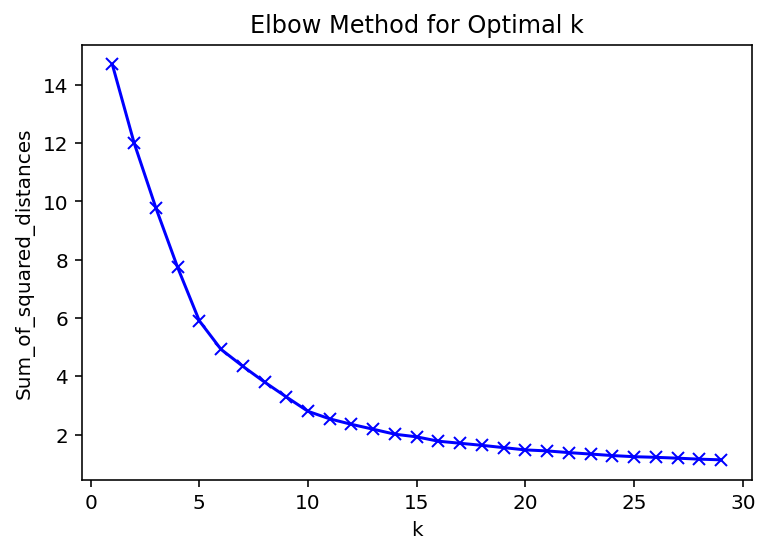

In [35]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method for Optimal k')
plt.show()

### 10 seems optimal, or maybe 5

In [36]:
# Imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'

# Load in the data
df = doc_topic_mat.iloc[:,:5]

# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(df)

# Create a PCA instance: pca
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(X_std)

x_pca = pca.transform(X_std)

In [37]:
modelkmeans = KMeans(n_clusters = 10)
hello = modelkmeans.fit(doc_topic_mat.iloc[:,:5])

In [38]:
labels = modelkmeans.fit_predict(doc_topic_mat.iloc[:,:5])

In [39]:
doc_topic_mat['cluster'] = labels

In [40]:
doc_topic_mat

,0,1,2,3,4,5,6,7,8,9,Song,Artist,cluster
0,0.110,0.001,0.000,0.001,0.006,0.000,0.007,0.030,0.012,0.013,Sacrifice / Healing Hands,Elton John,0
1,0.014,0.000,0.002,0.000,0.000,0.000,0.000,0.024,0.000,0.000,Killer,Adamski,1
2,0.000,0.000,0.000,0.000,0.000,0.041,0.060,0.047,0.000,0.000,Unchained Melody,The Righteous Brothers,1
3,0.009,0.000,0.000,0.003,0.030,0.000,0.000,0.050,0.002,0.000,Nothing Compares 2 U,Sinead O'Connor,1
4,0.000,0.003,0.000,0.000,0.000,0.004,0.003,0.052,0.004,0.000,Show Me Heaven,Maria McKee,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2636,0.005,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,ME!,Taylor Swift Ft Brendon Urie,1
2637,0.006,0.000,0.000,0.073,0.026,0.000,0.000,0.006,0.000,0.000,Harder,Jax Jones & Bebe Rexha,6
2638,0.038,0.002,0.000,0.057,0.000,0.026,0.000,0.028,0.002,0.000,Crown,Stormzy,6
2639,0.016,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,"fuck, i'm lonely",Lauv Ft Anne-Marie,1


In [41]:
doc_topic_mat.groupby(['cluster']).mean()*100

,0,1,2,3,4,5,6,7,8,9
cluster,,,,,,,,,,
0,7.303425,0.212671,0.580822,0.873288,0.869178,0.913699,0.634247,1.907192,0.685616,0.563014
1,1.183102,0.298499,0.471873,0.390995,0.441023,1.330239,0.872374,3.501001,1.181879,0.907893
2,0.425000,0.479167,0.229167,0.637500,29.637500,1.295833,0.304167,1.037500,0.954167,0.404167
3,1.164444,8.945556,1.605556,0.643333,0.643333,1.221111,1.346667,3.005556,1.734444,0.760000
4,0.490625,2.143750,23.531250,0.812500,1.146875,0.934375,0.153125,0.387500,0.715625,0.203125
5,0.123529,0.476471,0.564706,34.435294,0.529412,0.776471,0.082353,0.782353,1.270588,0.200000
6,1.269149,0.553191,0.875532,10.414894,0.617021,1.202128,0.737234,2.945745,1.187234,0.557447
7,0.502564,25.987179,1.179487,1.148718,0.548718,1.376923,0.610256,1.333333,0.643590,0.961538
8,1.778125,0.365625,0.716667,0.825000,8.762500,2.158333,0.858333,2.352083,0.520833,0.789583


In [42]:
doc_topic_mat.groupby(['cluster']).count().iloc[:,0]

cluster
0     292
1    1799
2      24
3      90
4      32
5      17
6      94
7      39
8      96
9     158
Name: 0, dtype: int64

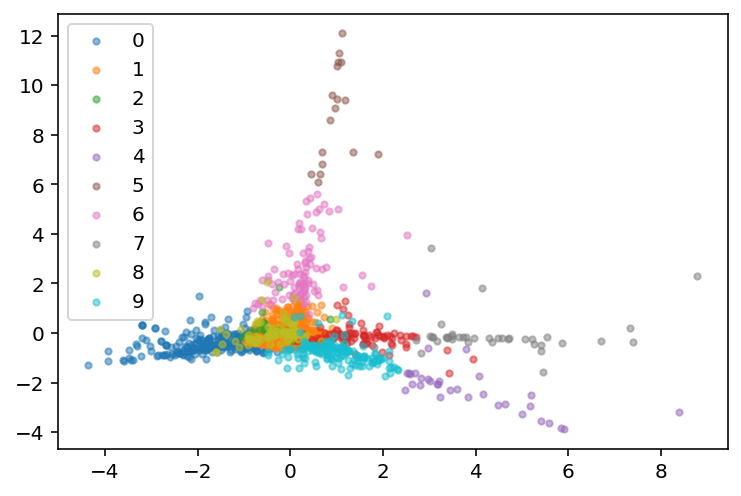

In [43]:
fig, ax = plt.subplots()
for g in np.unique(labels):
    ix = np.where(labels == g)
    ax.scatter(x_pca[:,0][ix], x_pca[:,1][ix], label = g, s = 10 ,alpha = 0.5)
ax.legend()
plt.show()